In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# df_test = pd.read_csv("/Users/chaoxu/code/local-spark/Data/qiancheng_vld/qiancheng_ios_vld_merge_0.09/data.csv",delimiter=",")

In [3]:
df1 = pd.read_csv("/Users/chaoxu/code/local-spark/Data/qiancheng_data/qiancheng_sample_new_merge_0.09/data.csv",delimiter=",")

/Users/chaoxu/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,20,67,71) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df1[['label']]=df1[['label']].fillna(0)

In [5]:
df1.label.value_counts(normalize=True)

0.0    0.852147
1.0    0.147853
Name: label, dtype: float64

In [6]:
df1.loc[df1.label == 1]['maxent_id'].drop_duplicates().count()

462

In [7]:
df1.loc[df1.label == 0]['maxent_id'].drop_duplicates().count()

4620

In [8]:
df1.loc[(df1.os == "ios") & (df1.label == 1)]['maxent_id'].drop_duplicates().count()

159

In [9]:
df1.loc[(df1.os == "android") & (df1.label == 1)]['maxent_id'].drop_duplicates().count()

303

In [22]:
df = pd.read_csv("/Users/chaoxu/code/local-spark/Data/qiancheng_data/qiancheng_sample_new_merge_0.05/data.csv",delimiter=",")

In [23]:
df[['label']]=df[['label']].fillna(0)

In [24]:
df.shape

(49998, 83)

In [25]:
df.label.value_counts(normalize=True)

0.0    0.915517
1.0    0.084483
Name: label, dtype: float64

In [26]:
df['maxent_id'].drop_duplicates().count()

9240

In [27]:
df.loc[df.label == 1]['maxent_id'].drop_duplicates().count()

462

In [28]:
df.loc[df.label == 0]['maxent_id'].drop_duplicates().count()

8778

In [29]:
# df_ios_test = pd.read_csv("/Users/chaoxu/code/local-spark/Data/qiancheng_ios_vld_0.05.csv")

In [30]:
# df_ios_test.loc[df_ios_test.label == 1]['maxent_id'].drop_duplicates().count()

In [31]:
df.loc[df.os == "ios"]['os'].count()

18005

In [32]:
df.loc[(df.os == "ios") & (df.label == 1)]['maxent_id'].drop_duplicates().count()

159

In [33]:
df.loc[(df.os == "android") & (df.label == 1)]['maxent_id'].drop_duplicates().count()

303

In [34]:
df.loc[df.os == "android"]['os'].count()

31993

In [35]:
df_test[['label']]=df_test[['label']].fillna(0)

In [36]:
df_test.loc[df_test.label == 1]['maxent_id'].drop_duplicates().count()

500

In [37]:
df_test.loc[df_test.label == 0]['maxent_id'].drop_duplicates().count()

5000

In [17]:
df['proxyIP.value'].unique()

array([False, True], dtype=object)

In [35]:
from datetime import datetime, timedelta
df["timestamp"] = pd.to_datetime(df['timestamp'], unit='ms', utc=True)
df["timestamp"] = pd.DatetimeIndex(df["timestamp"]) + timedelta(hours=8)
df = df.sort_values(by="timestamp")
df['timestamp'].max()

Timestamp('2017-08-20 23:54:02.227000')

In [36]:
df['timestamp'].min()

Timestamp('2017-08-01 00:00:47.067000')

In [37]:
object_df = df.select_dtypes(include=['object'])
object_df.columns

Index([u'maxent_id', u'event_id', u'event_type', u'ipGeo', u'ipSeg24', u'os',
       u'scenario'],
      dtype='object')

In [38]:
df[['label']]=df[['label']].fillna(0)

In [39]:
import re
loan = re.compile('.*loan$')
loan_match = np.vectorize(lambda x:bool(loan.match(x)))
loan_cols = df.columns.values[loan_match(df.columns.values)]
loan_cols

array(['aid_loan', 'idfa_loan', 'imei_loan', 'mac_loan'], dtype=object)

In [40]:
df[loan_cols]=df[loan_cols].fillna(0)

In [41]:
from Pic.maxent_style import maxent_style
from Pic.maxent_font import tick_font

In [42]:
@maxent_style
def label_time(df,palette=None):
    df_label = df[["timestamp","label"]]
    df_label = df_label.set_index("timestamp")
    df_label_1 = df_label.where(df_label["label"] == 1).resample("H").count()
    df_label_0 = df_label.where(df_label["label"] == 0).resample("H").count()
    fig, axes = plt.subplots(dpi=600)
    tick_font(axes,font_size="x-small",rotation=90)
    axes.plot_date(df_label_0.index,df_label_0.values, color=next(palette), fmt="-", label="label 0")
    axes.plot_date(df_label_1.index,df_label_1.values, color=next(palette), fmt="-", label="label 1")
    axes.legend(loc='upper right')
    plt.show()

label_time


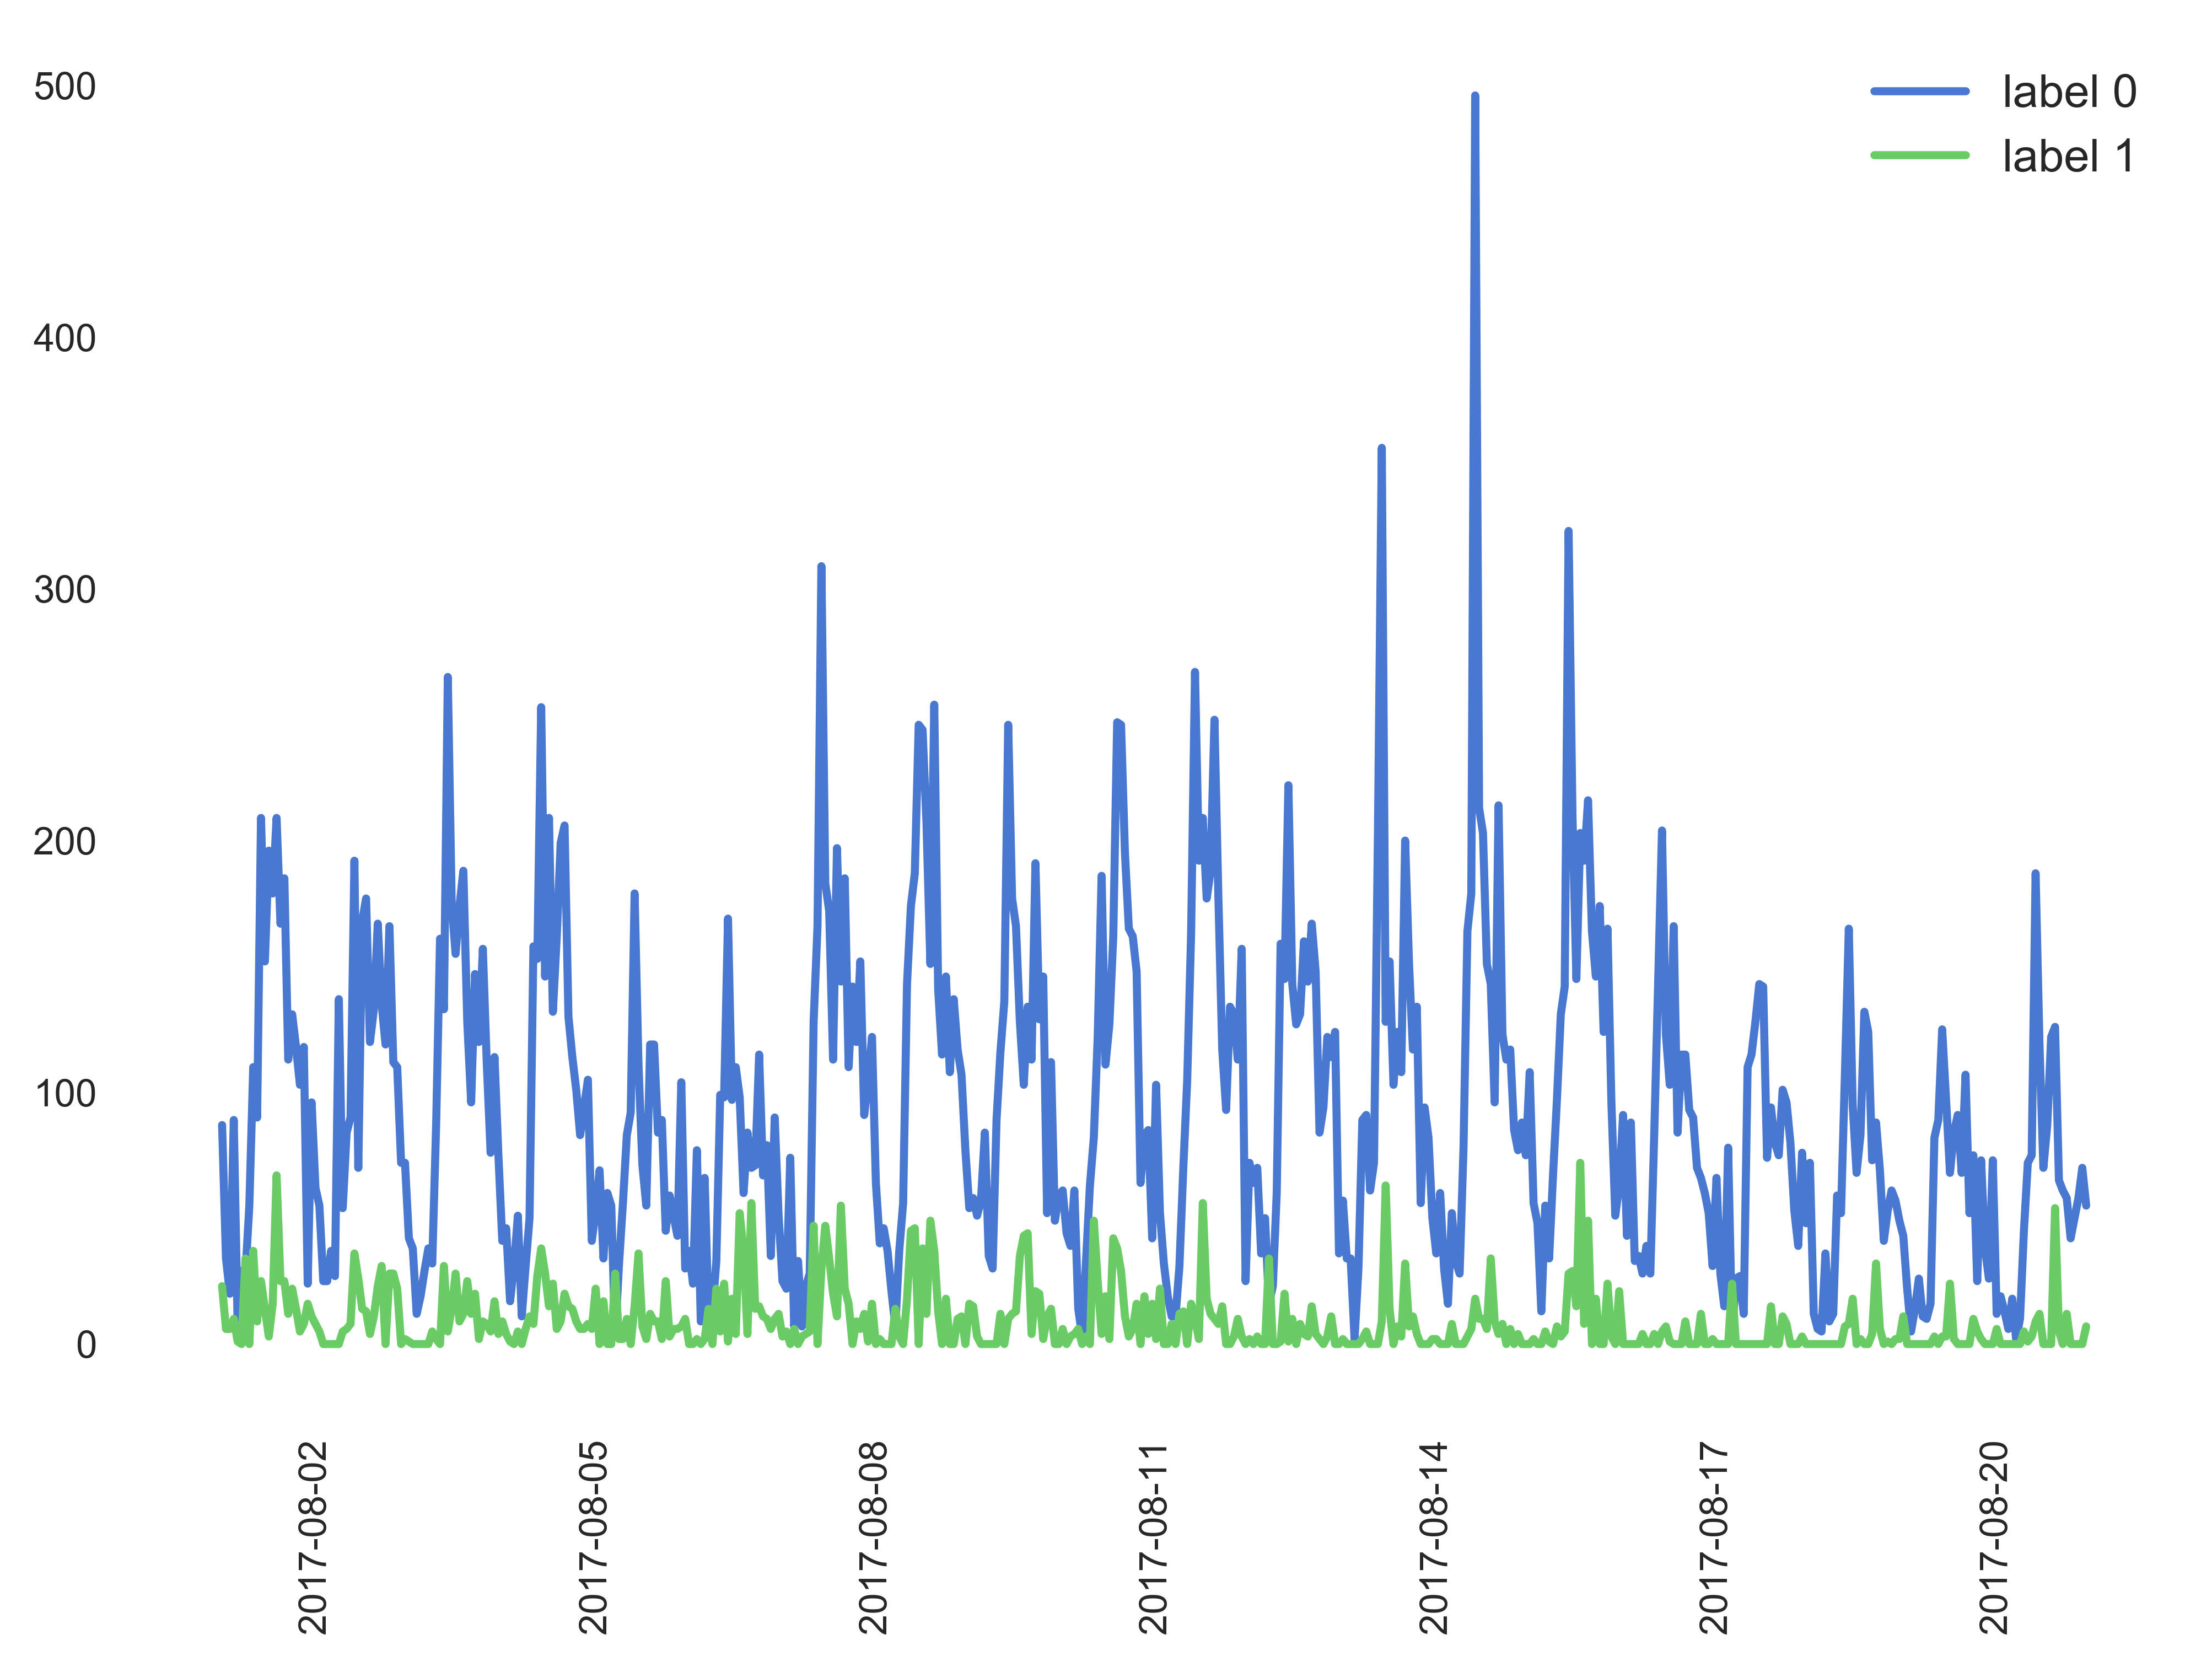

In [43]:
label_time(df)

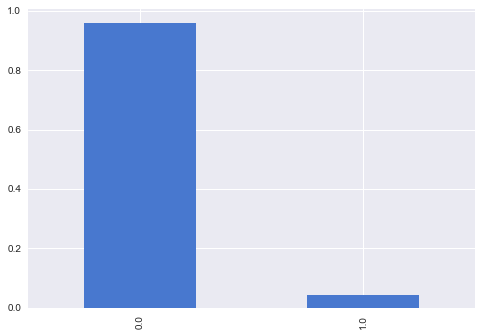

In [17]:
df.label.value_counts(normalize=True).plot(kind='bar')
plt.show()

In [18]:
df.label.value_counts(normalize=True)

0.0    0.958335
1.0    0.041665
Name: label, dtype: float64

In [19]:
df.label.value_counts()

0.0    97156
1.0     4224
Name: label, dtype: int64

In [20]:
df.maxent_id.loc[df.label == 0].drop_duplicates().count()

19000

In [21]:
df.maxent_id.loc[df.label == 1].drop_duplicates().count()

462

In [24]:
X = df.ix[:, df.columns != 'label']
y = df.ix[:, df.columns == 'label']

In [23]:
Cat_Colums = X.dtypes.pipe(lambda X: X[X=='object']).index

In [24]:
Cat_Colums

Index([u'maxent_id', u'event_id', u'event_type', u'ipGeo', u'ipSeg24', u'os',
       u'scenario'],
      dtype='object')

In [26]:
one_zro_cols = bool_df.columns
for i in one_zro_cols:
    print "cos is {0}".format(i)
    print df[i].value_counts(normalize=True)
    print "\n"
    print "label = 0 cos is {0}".format(i)
    print df[i].loc[df.label ==0].value_counts(normalize=True)
    print "\n"
    print "label = 1 cos is {0}".format(i)
    print df[i].loc[df.label ==1].value_counts(normalize=True)
    print "-------------\n"

In [43]:
import re
anormaly = re.compile('.*anomaly$')
anormaly_match = np.vectorize(lambda x:bool(anormaly.match(x)))
anormaly_cols = df.columns.values[anormaly_match(df.columns.values)]

value = re.compile('.*value$')
value_match = np.vectorize(lambda x:bool(value.match(x)))
value_cols = df.columns.values[value_match(df.columns.values)]
count = re.compile('.*counts$')
count_match = np.vectorize(lambda x:bool(count.match(x)))
count_cols = df.columns.values[count_match(df.columns.values)]

In [28]:
for col in anormaly_cols:
#     print "label = 0 --> col is {0} \n".format(col)
    df0_desc = df.loc[df.label == 0][col].describe(percentiles=[.05,.1,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95])
#     print "label = 1 --> col is {0} \n".format(col)
    df1_desc = df.loc[df.label == 1][col].describe(percentiles=[.05,.1,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95])
    df_diff = df0_desc - df1_desc
    print "sub 0 vs 1 of {0}".format(col)
    print df_diff
    df_diff = df_diff.drop(['count','mean','std','min','max']).abs()
    row_name = df_diff.idxmax()
    print "!!!max Percentile Values from {0}".format(row_name)
    print "-----\n"

sub 0 vs 1 of cracked.anomaly
count    75993.0
mean         0.0
std          0.0
min          0.0
5%           0.0
10%          0.0
25%          0.0
30%          0.0
35%          0.0
40%          0.0
45%          0.0
50%          0.0
55.0%        0.0
60%          0.0
65%          0.0
70%          0.0
75%          0.0
80%          0.0
85%          0.0
90%          0.0
95%          0.0
max          0.0
Name: cracked.anomaly, dtype: float64
!!!max Percentile Values from 5%
-----

sub 0 vs 1 of did.15m.anomaly
count    75989.000000
mean         0.035994
std          4.061037
min          0.000000
5%           0.000000
10%          0.000000
25%          0.000000
30%          0.000000
35%          0.000000
40%          0.000000
45%          0.000000
50%          0.000000
55.0%        0.000000
60%          0.000000
65%          0.000000
70%          0.000000
75%          0.000000
80%          0.000000
85%          0.000000
90%          0.000000
95%          0.000000
max        998.000000
Name

In [29]:
# count_ = re.compile('.*counts$')
# count_match = np.vectorize(lambda x:bool(count_.match(x)))
# count_cols = df.columns.values[count_match(df.columns.values)]

In [30]:
# for col in count_cols:
# #     print "label = 0 --> col is {0} \n".format(col)
#     df0_desc = df.loc[df.label == 0][col].describe(percentiles=[.05,.1,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95])
# #     print "label = 1 --> col is {0} \n".format(col)
#     df1_desc = df.loc[df.label == 1][col].describe(percentiles=[.05,.1,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95])
#     df_diff = df0_desc - df1_desc
#     print "sub 0 vs 1 of {0}".format(col)
#     print df_diff
#     df_diff = df_diff.drop(['count','mean','std','min','max']).abs()
#     row_name = df_diff.idxmax()
#     print "!!!max Percentile Values from {0}".format(row_name)
#     print "-----\n"

In [31]:
df['idcIP.anomaly'].value_counts()

1.0    84441
Name: idcIP.anomaly, dtype: int64

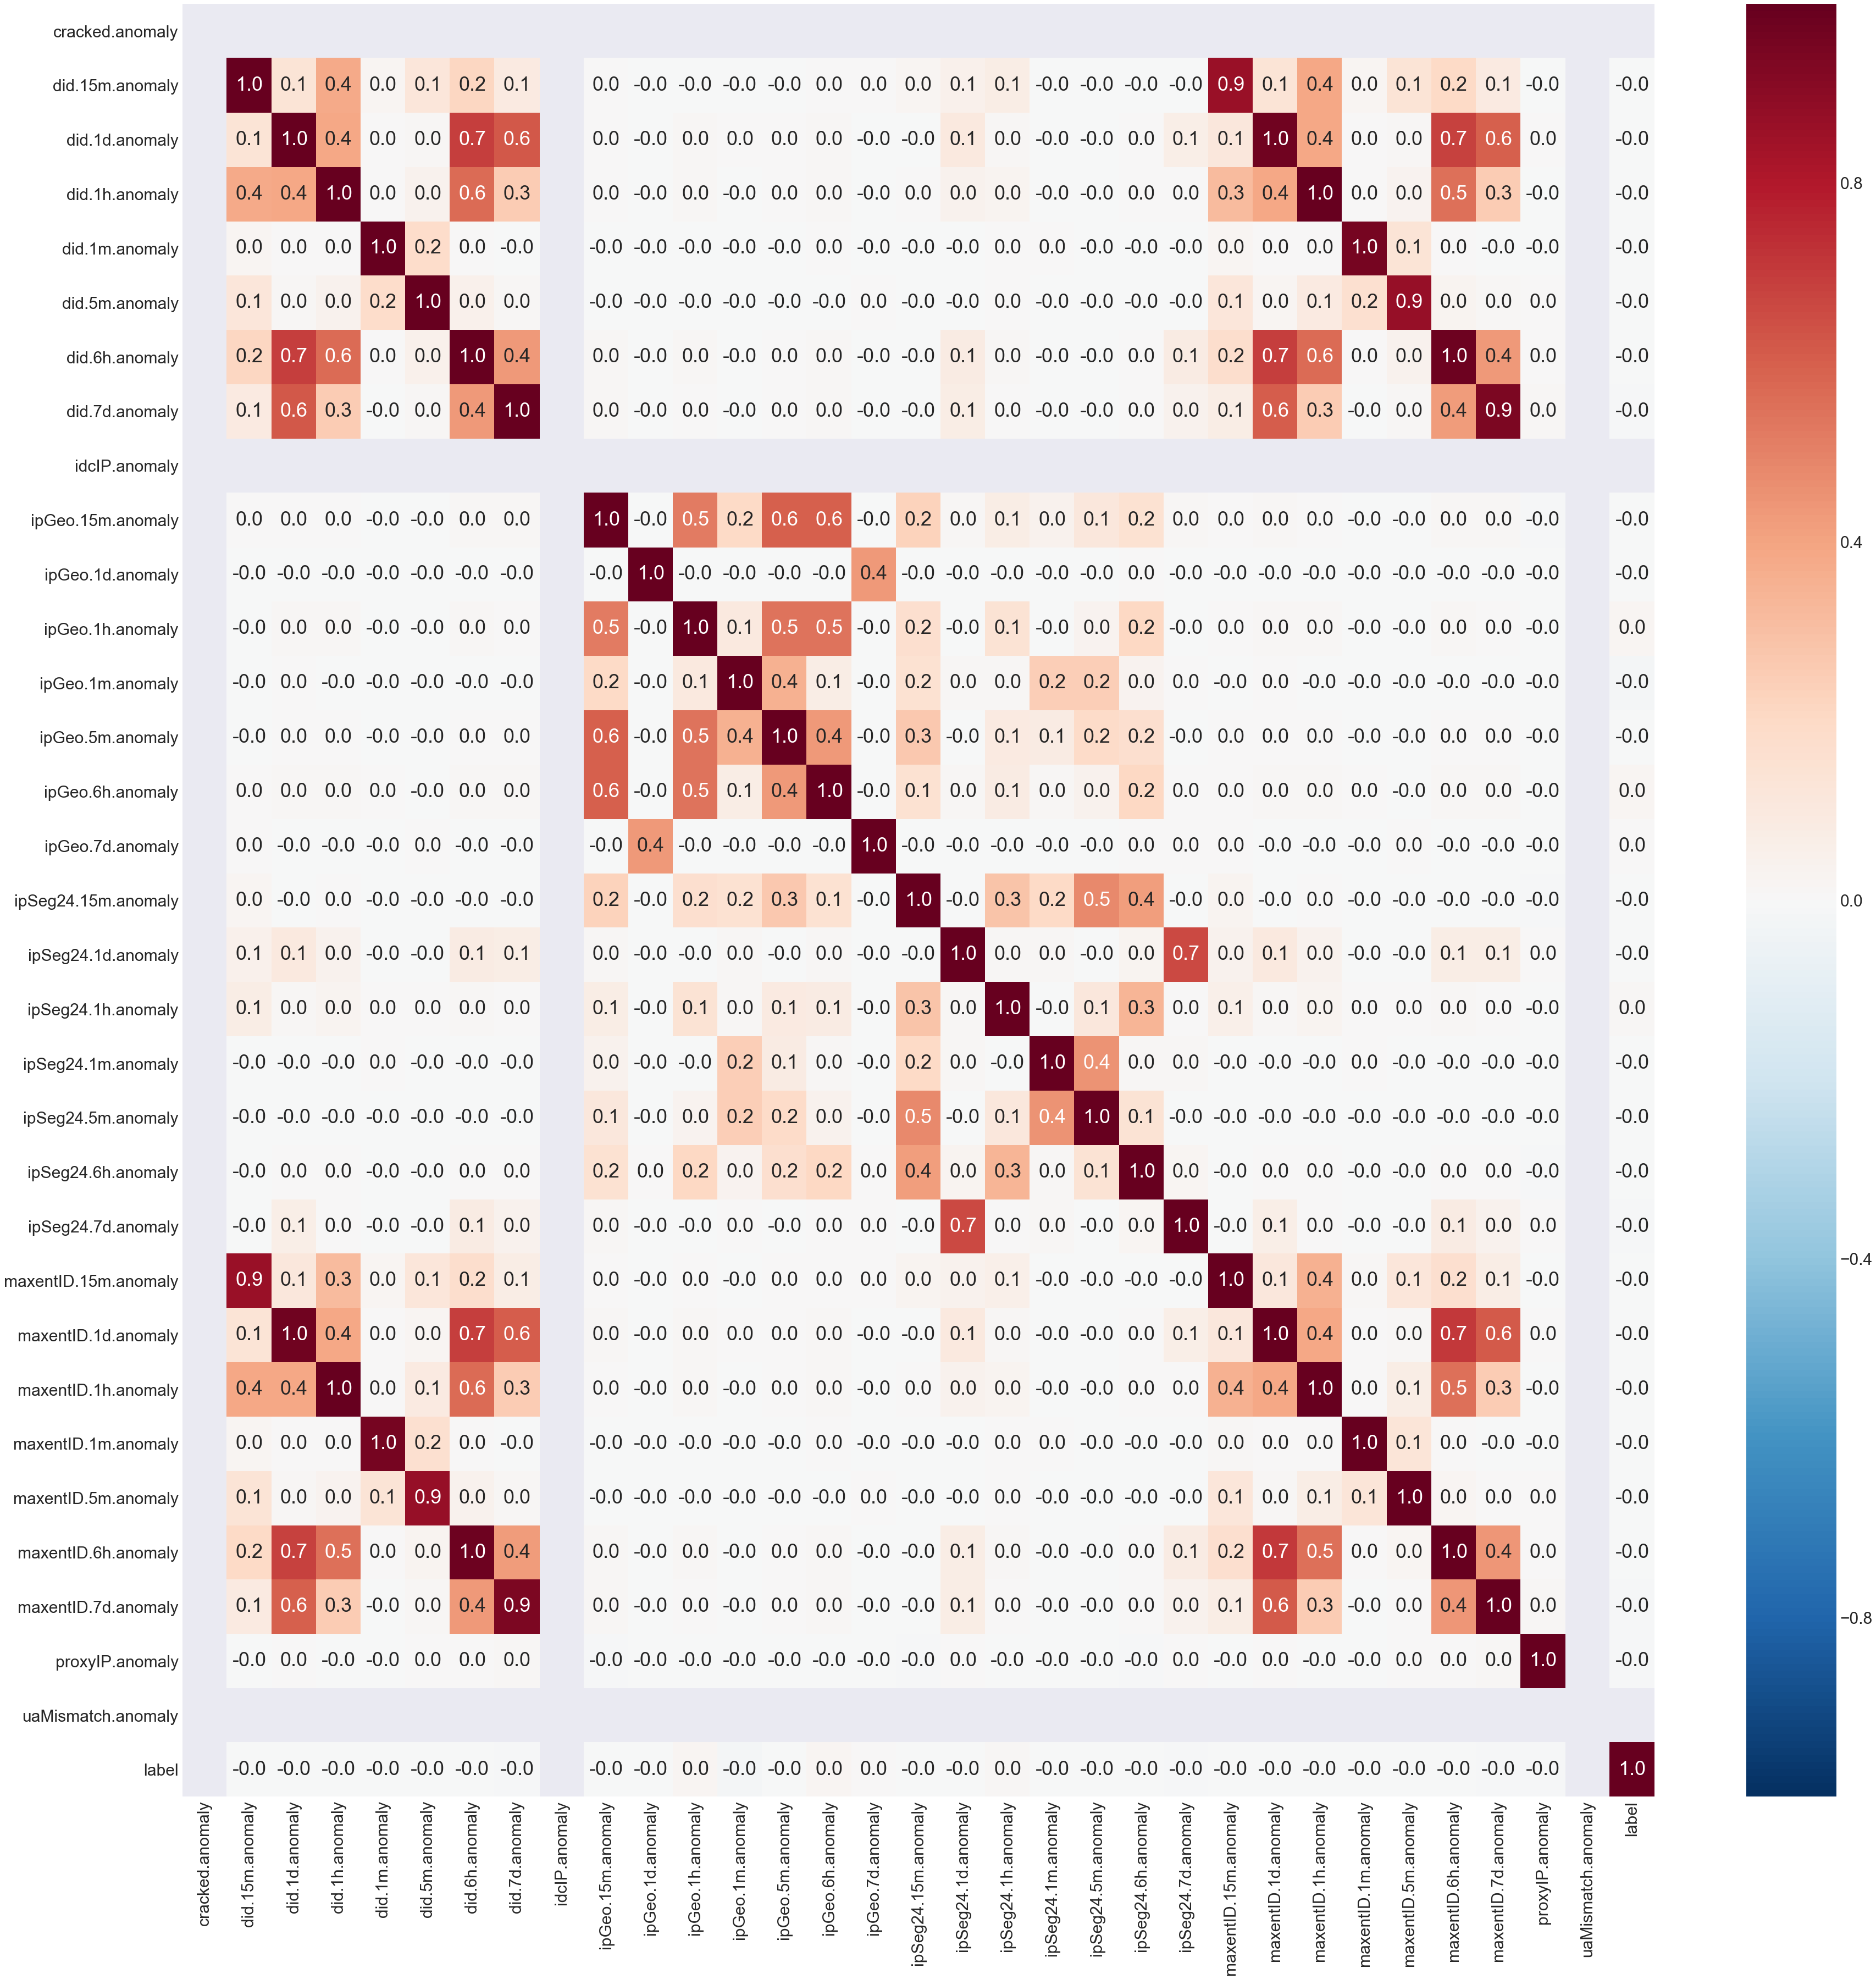

In [32]:
import seaborn as sns
sns.set(font_scale=3.0)
fig,ax= plt.subplots(figsize=(60,60))
# fig,ax= plt.subplots(dpi=400)
X_anormaly = X[anormaly_cols]
df_anormaly = pd.concat([X_anormaly,y],axis=1)
# sns.heatmap(df_anormaly.corr(),ax=ax)
sns.heatmap(df_anormaly.corr(),ax=ax,annot=True,fmt='.1f')
plt.show()

In [33]:
# y_0 = y.loc[y.label == 0]
# fig,ax= plt.subplots(figsize=(60,60))
# # fig,ax= plt.subplots(dpi=400)
# X_anormaly_0 = df.loc[df.label ==0][anormaly_cols]
# df_anormaly_0 = pd.concat([X_anormaly_0,y_0],axis=1)
# # sns.heatmap(df_anormaly.corr(),ax=ax)
# sns.heatmap(df_anormaly_0.corr(),ax=ax,annot=True,fmt='.1f')
# plt.show()

In [34]:
# y_1 = y.loc[y.label == 1]
# fig,ax= plt.subplots(figsize=(60,60))
# # fig,ax= plt.subplots(dpi=400)
# X_anormaly_1 = df.loc[df.label ==1][anormaly_cols]
# df_anormaly_1 = pd.concat([X_anormaly_1,y_1],axis=1)
# # sns.heatmap(df_anormaly.corr(),ax=ax)
# sns.heatmap(df_anormaly_1.corr(),ax=ax,annot=True,fmt='.1f')
# plt.show()

In [46]:
# fig,ax= plt.subplots(figsize=(60,60))
# # fig,ax= plt.subplots(dpi=400)
# X_value_0 = df.loc[df.label ==0][value_cols]
# df_value_0 = pd.concat([X_value_0,y_0],axis=1)
# # sns.heatmap(df_anormaly.corr(),ax=ax)
# sns.heatmap(df_value_0.corr(),ax=ax,annot=True,fmt='.1f')
# plt.show()

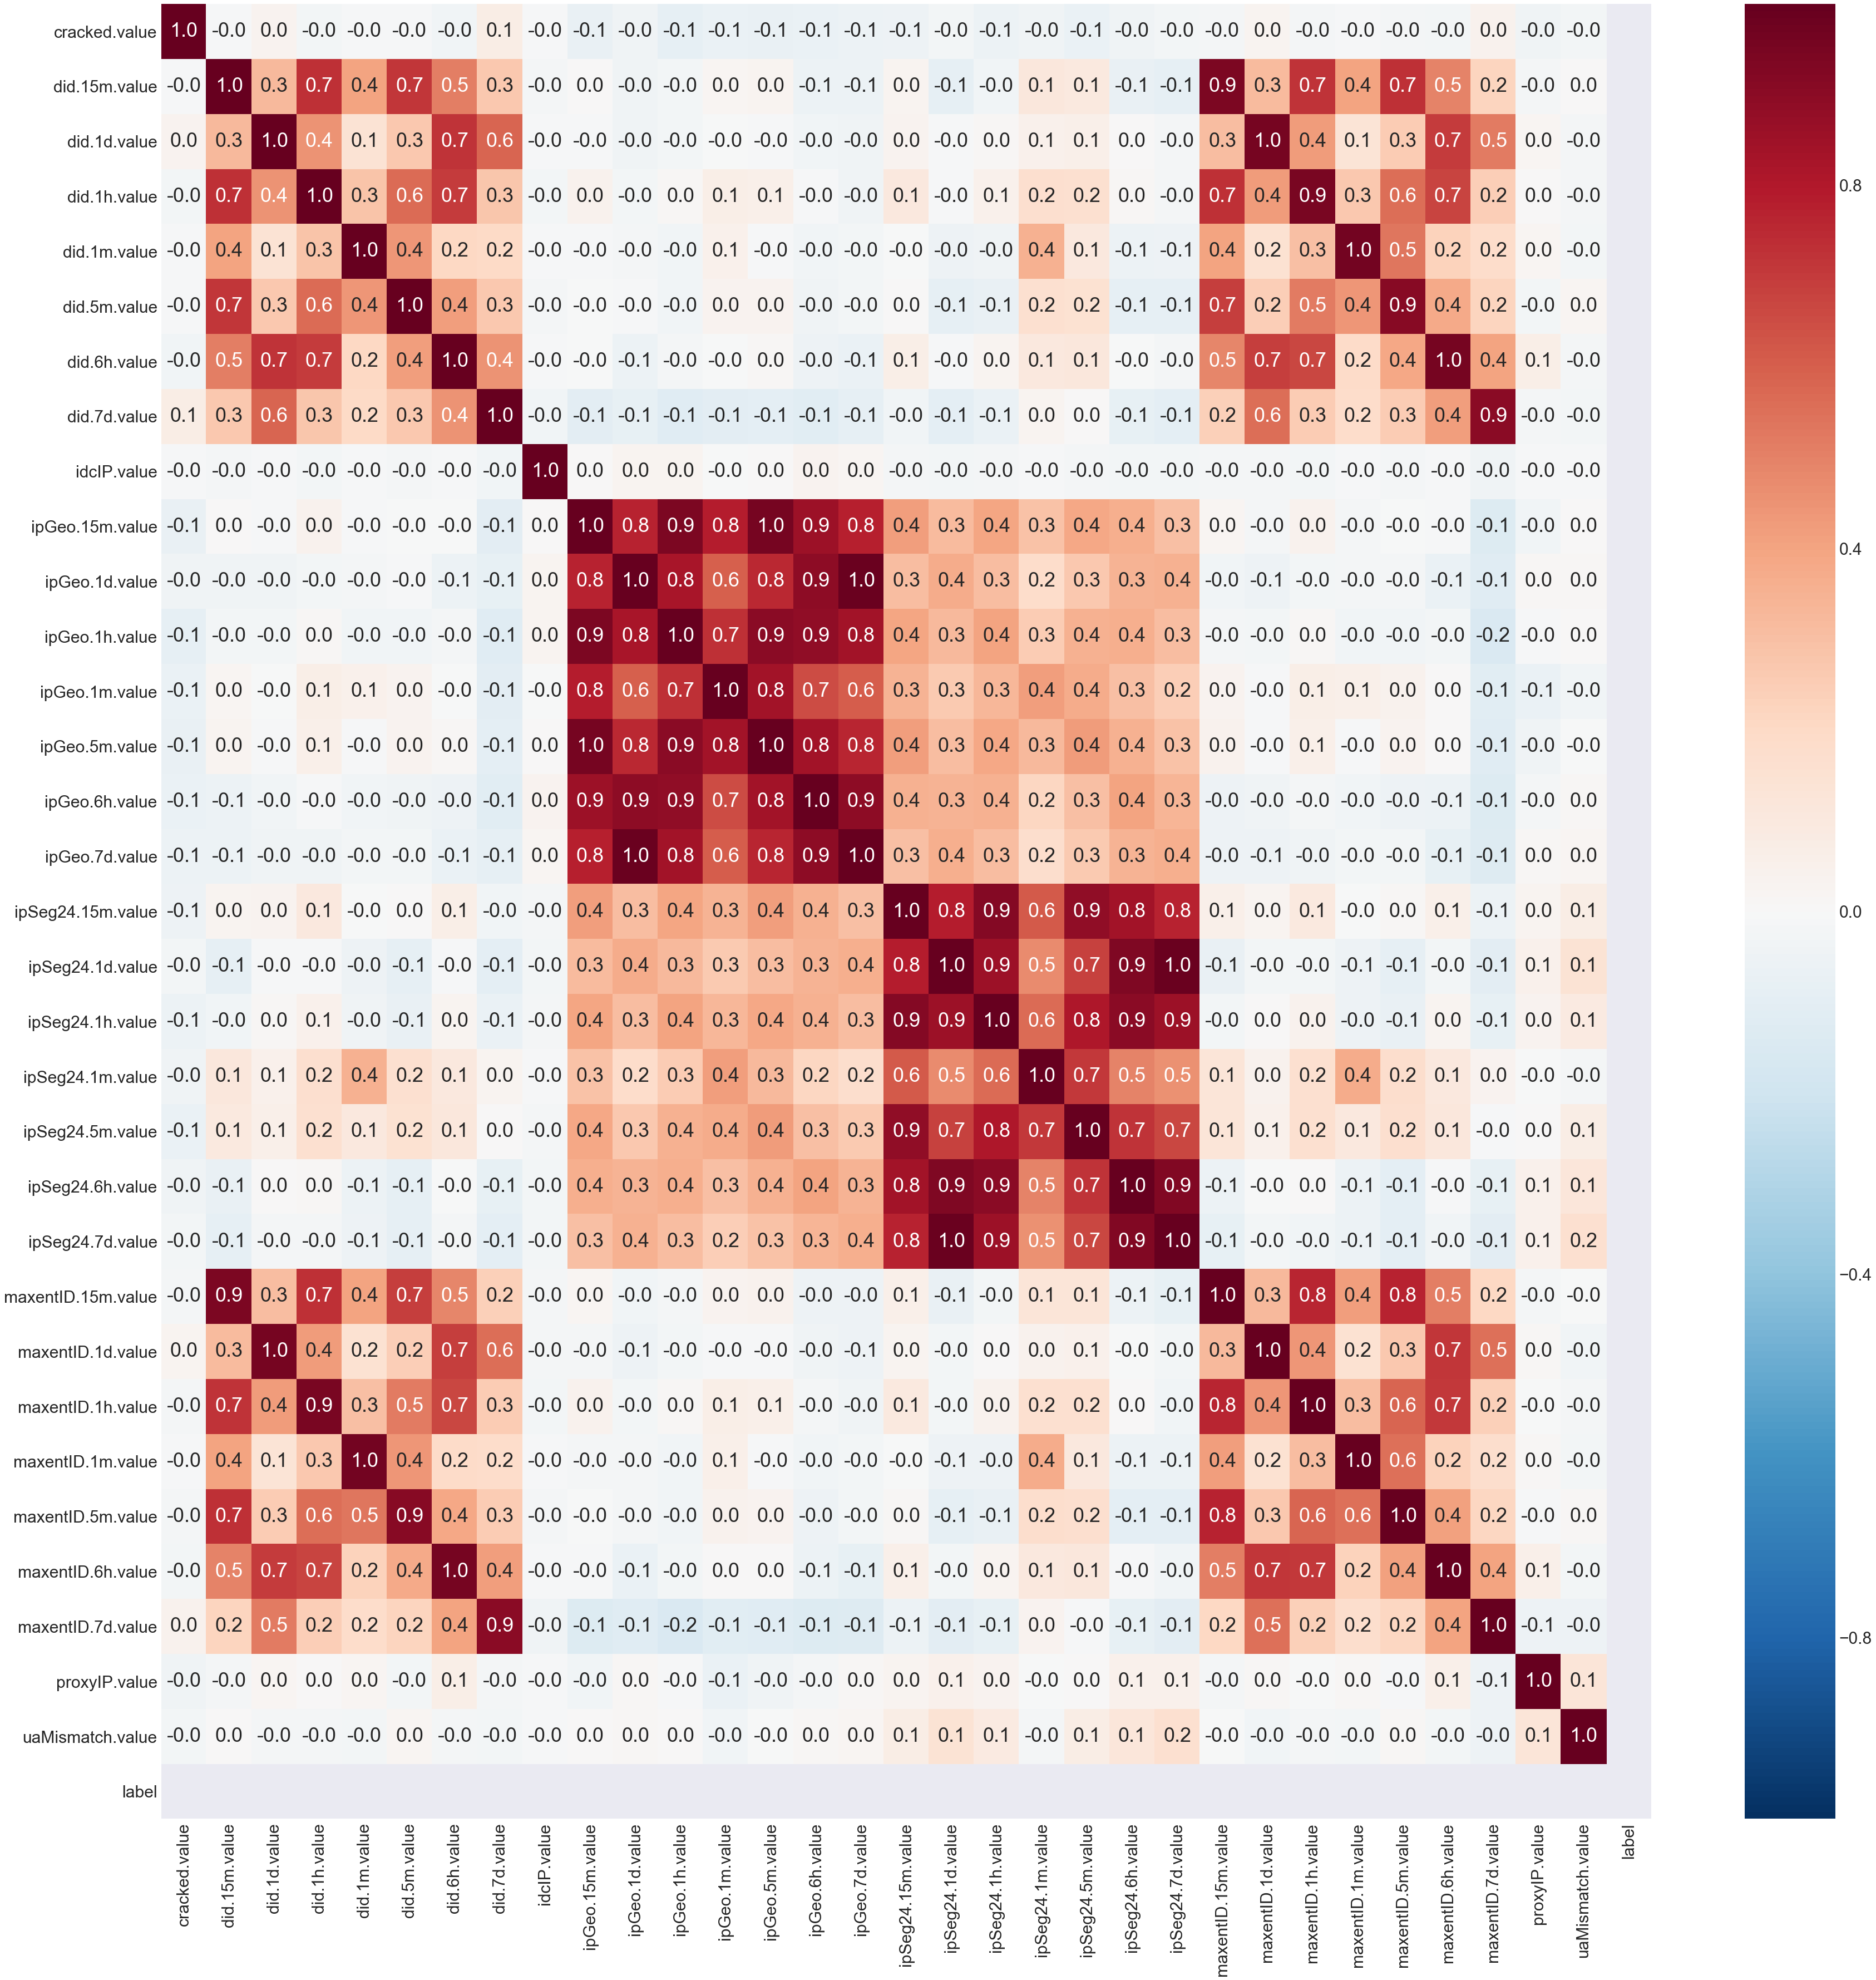

In [35]:
fig,ax= plt.subplots(figsize=(60,60))
# fig,ax= plt.subplots(dpi=400)
X_value_1 = df.loc[df.label ==1][value_cols]
df_value_1 = pd.concat([X_value_1,y_1],axis=1)
# sns.heatmap(df_anormaly.corr(),ax=ax)
sns.heatmap(df_value_1.corr(),ax=ax,annot=True,fmt='.1f')
plt.show()

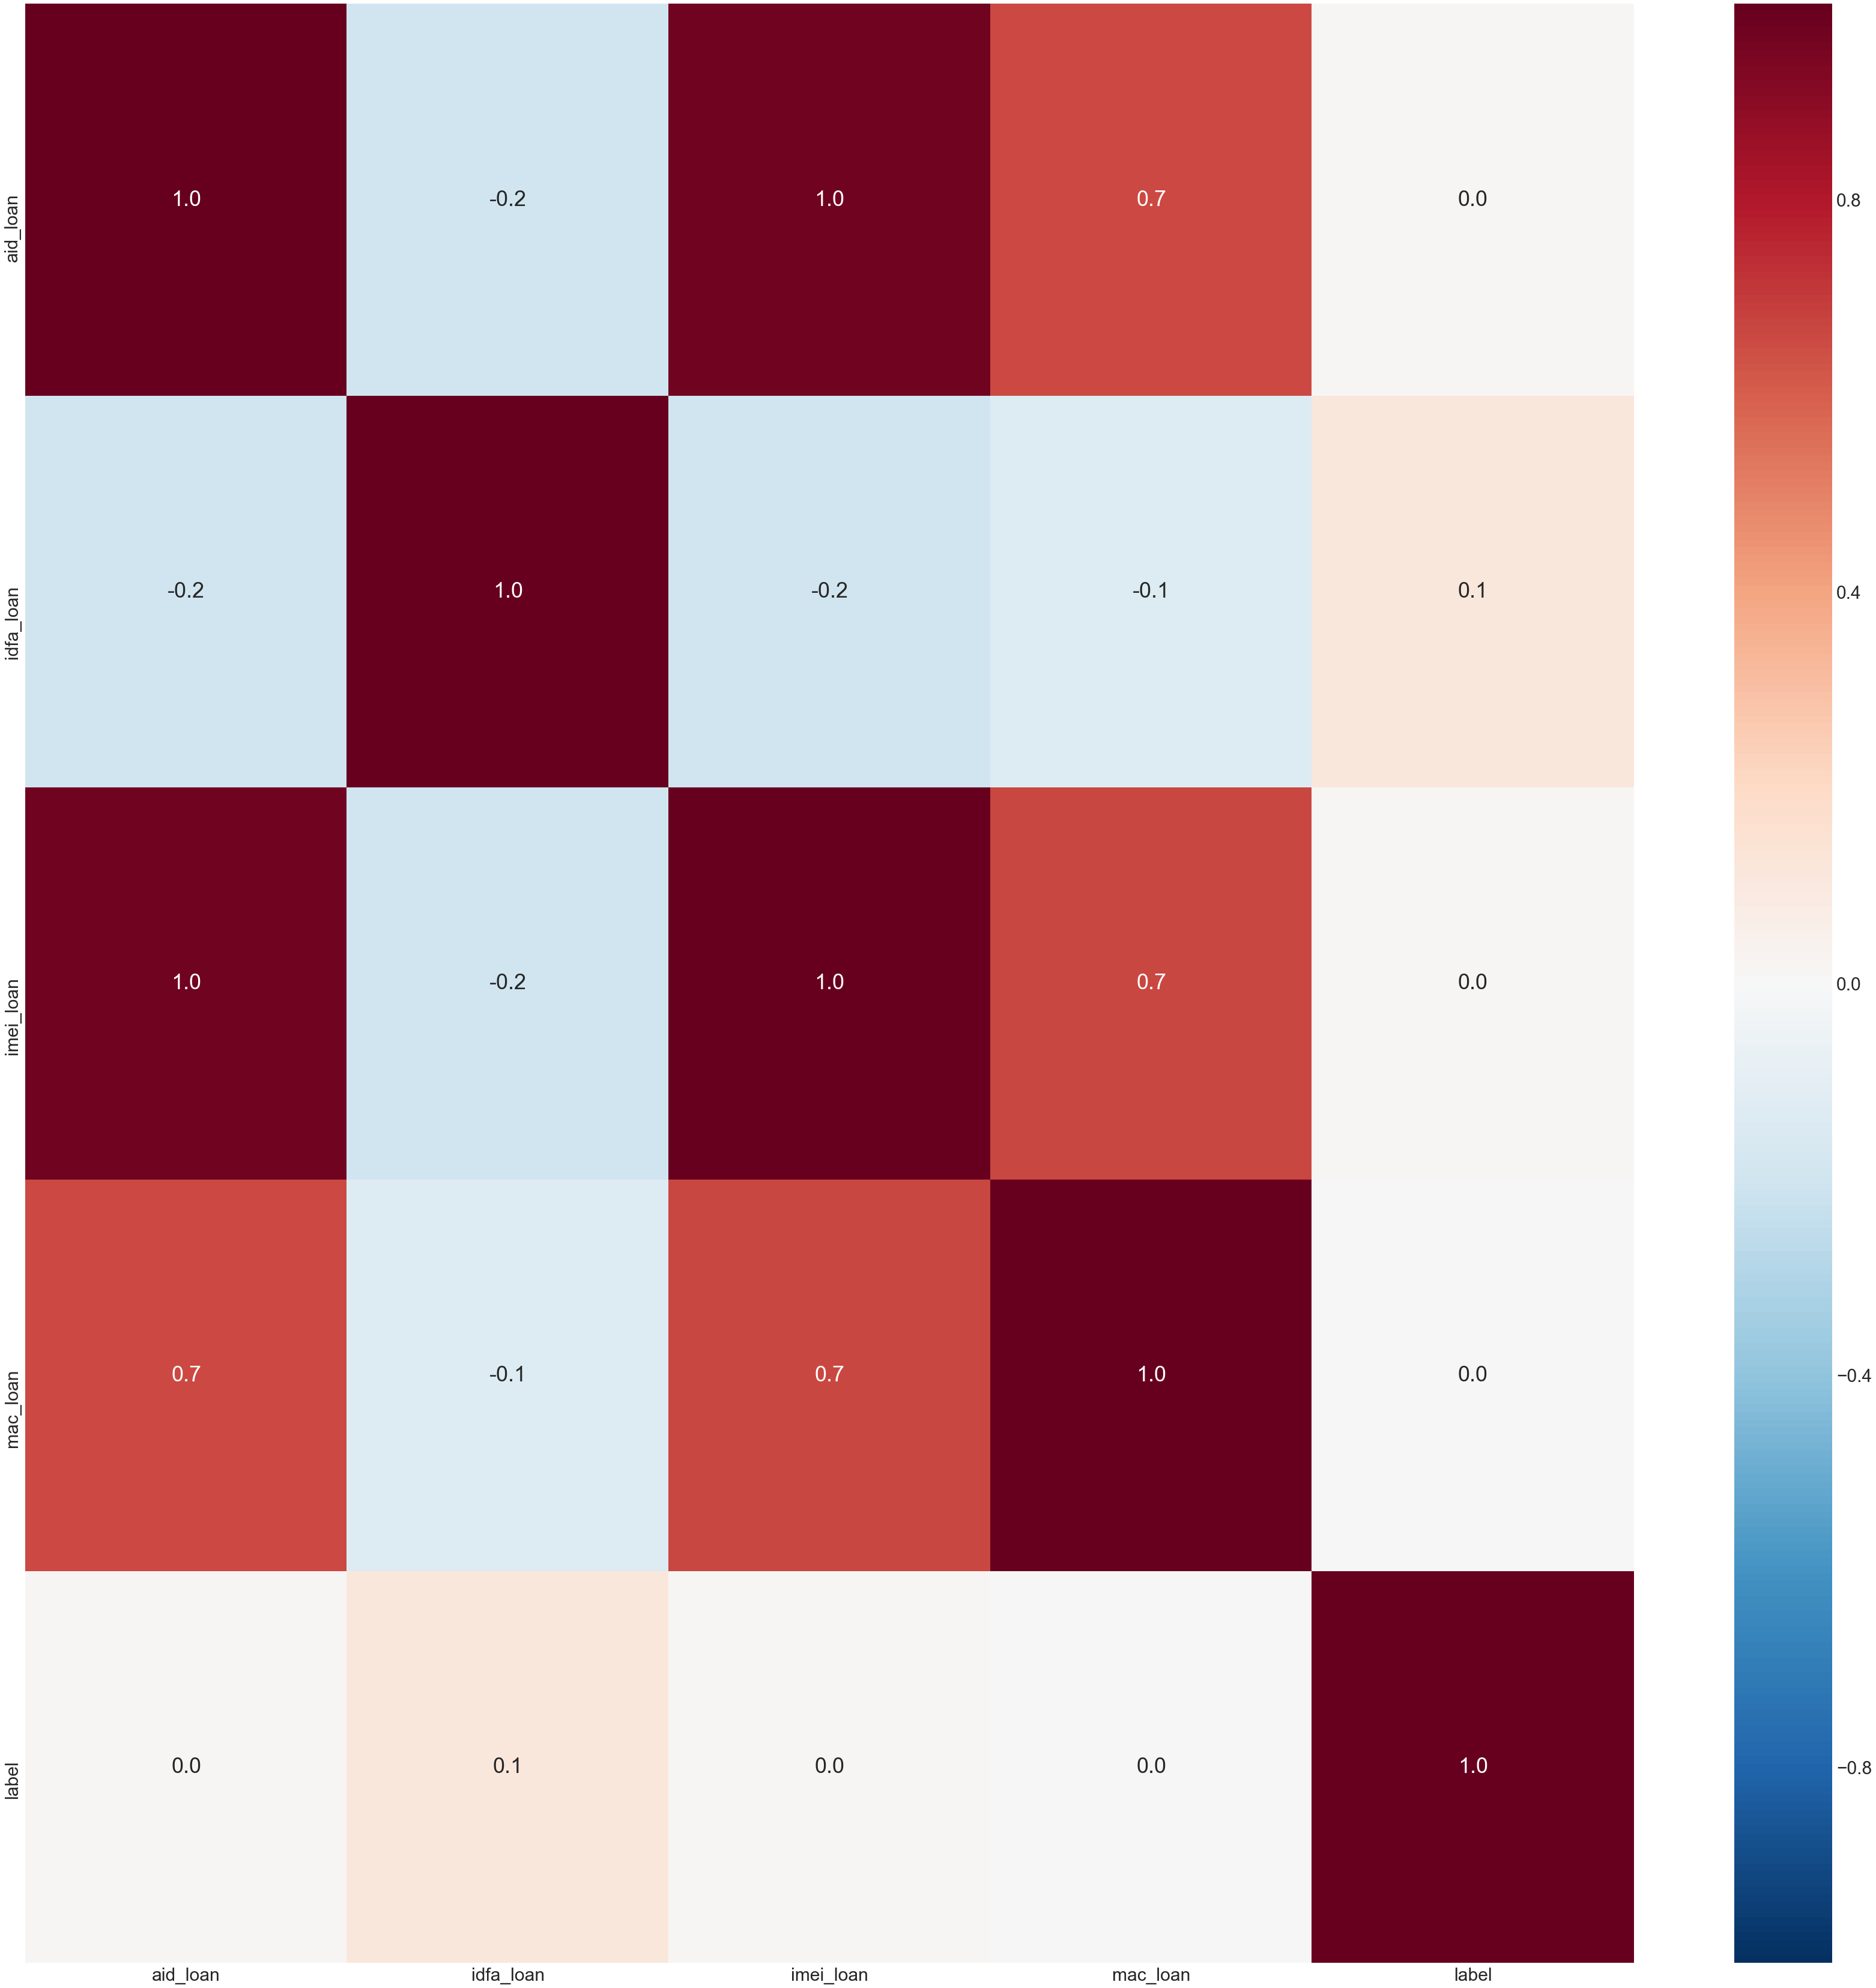

In [39]:
import seaborn as sns
sns.set(font_scale=3.0)
fig,ax= plt.subplots(figsize=(60,60))
# fig,ax= plt.subplots(dpi=400)
X_loan = X[loan_cols]
df_loan = pd.concat([X_loan,y],axis=1)
# sns.heatmap(df_anormaly.corr(),ax=ax)
sns.heatmap(df_loan.corr(),ax=ax,annot=True,fmt='.1f')
plt.show()

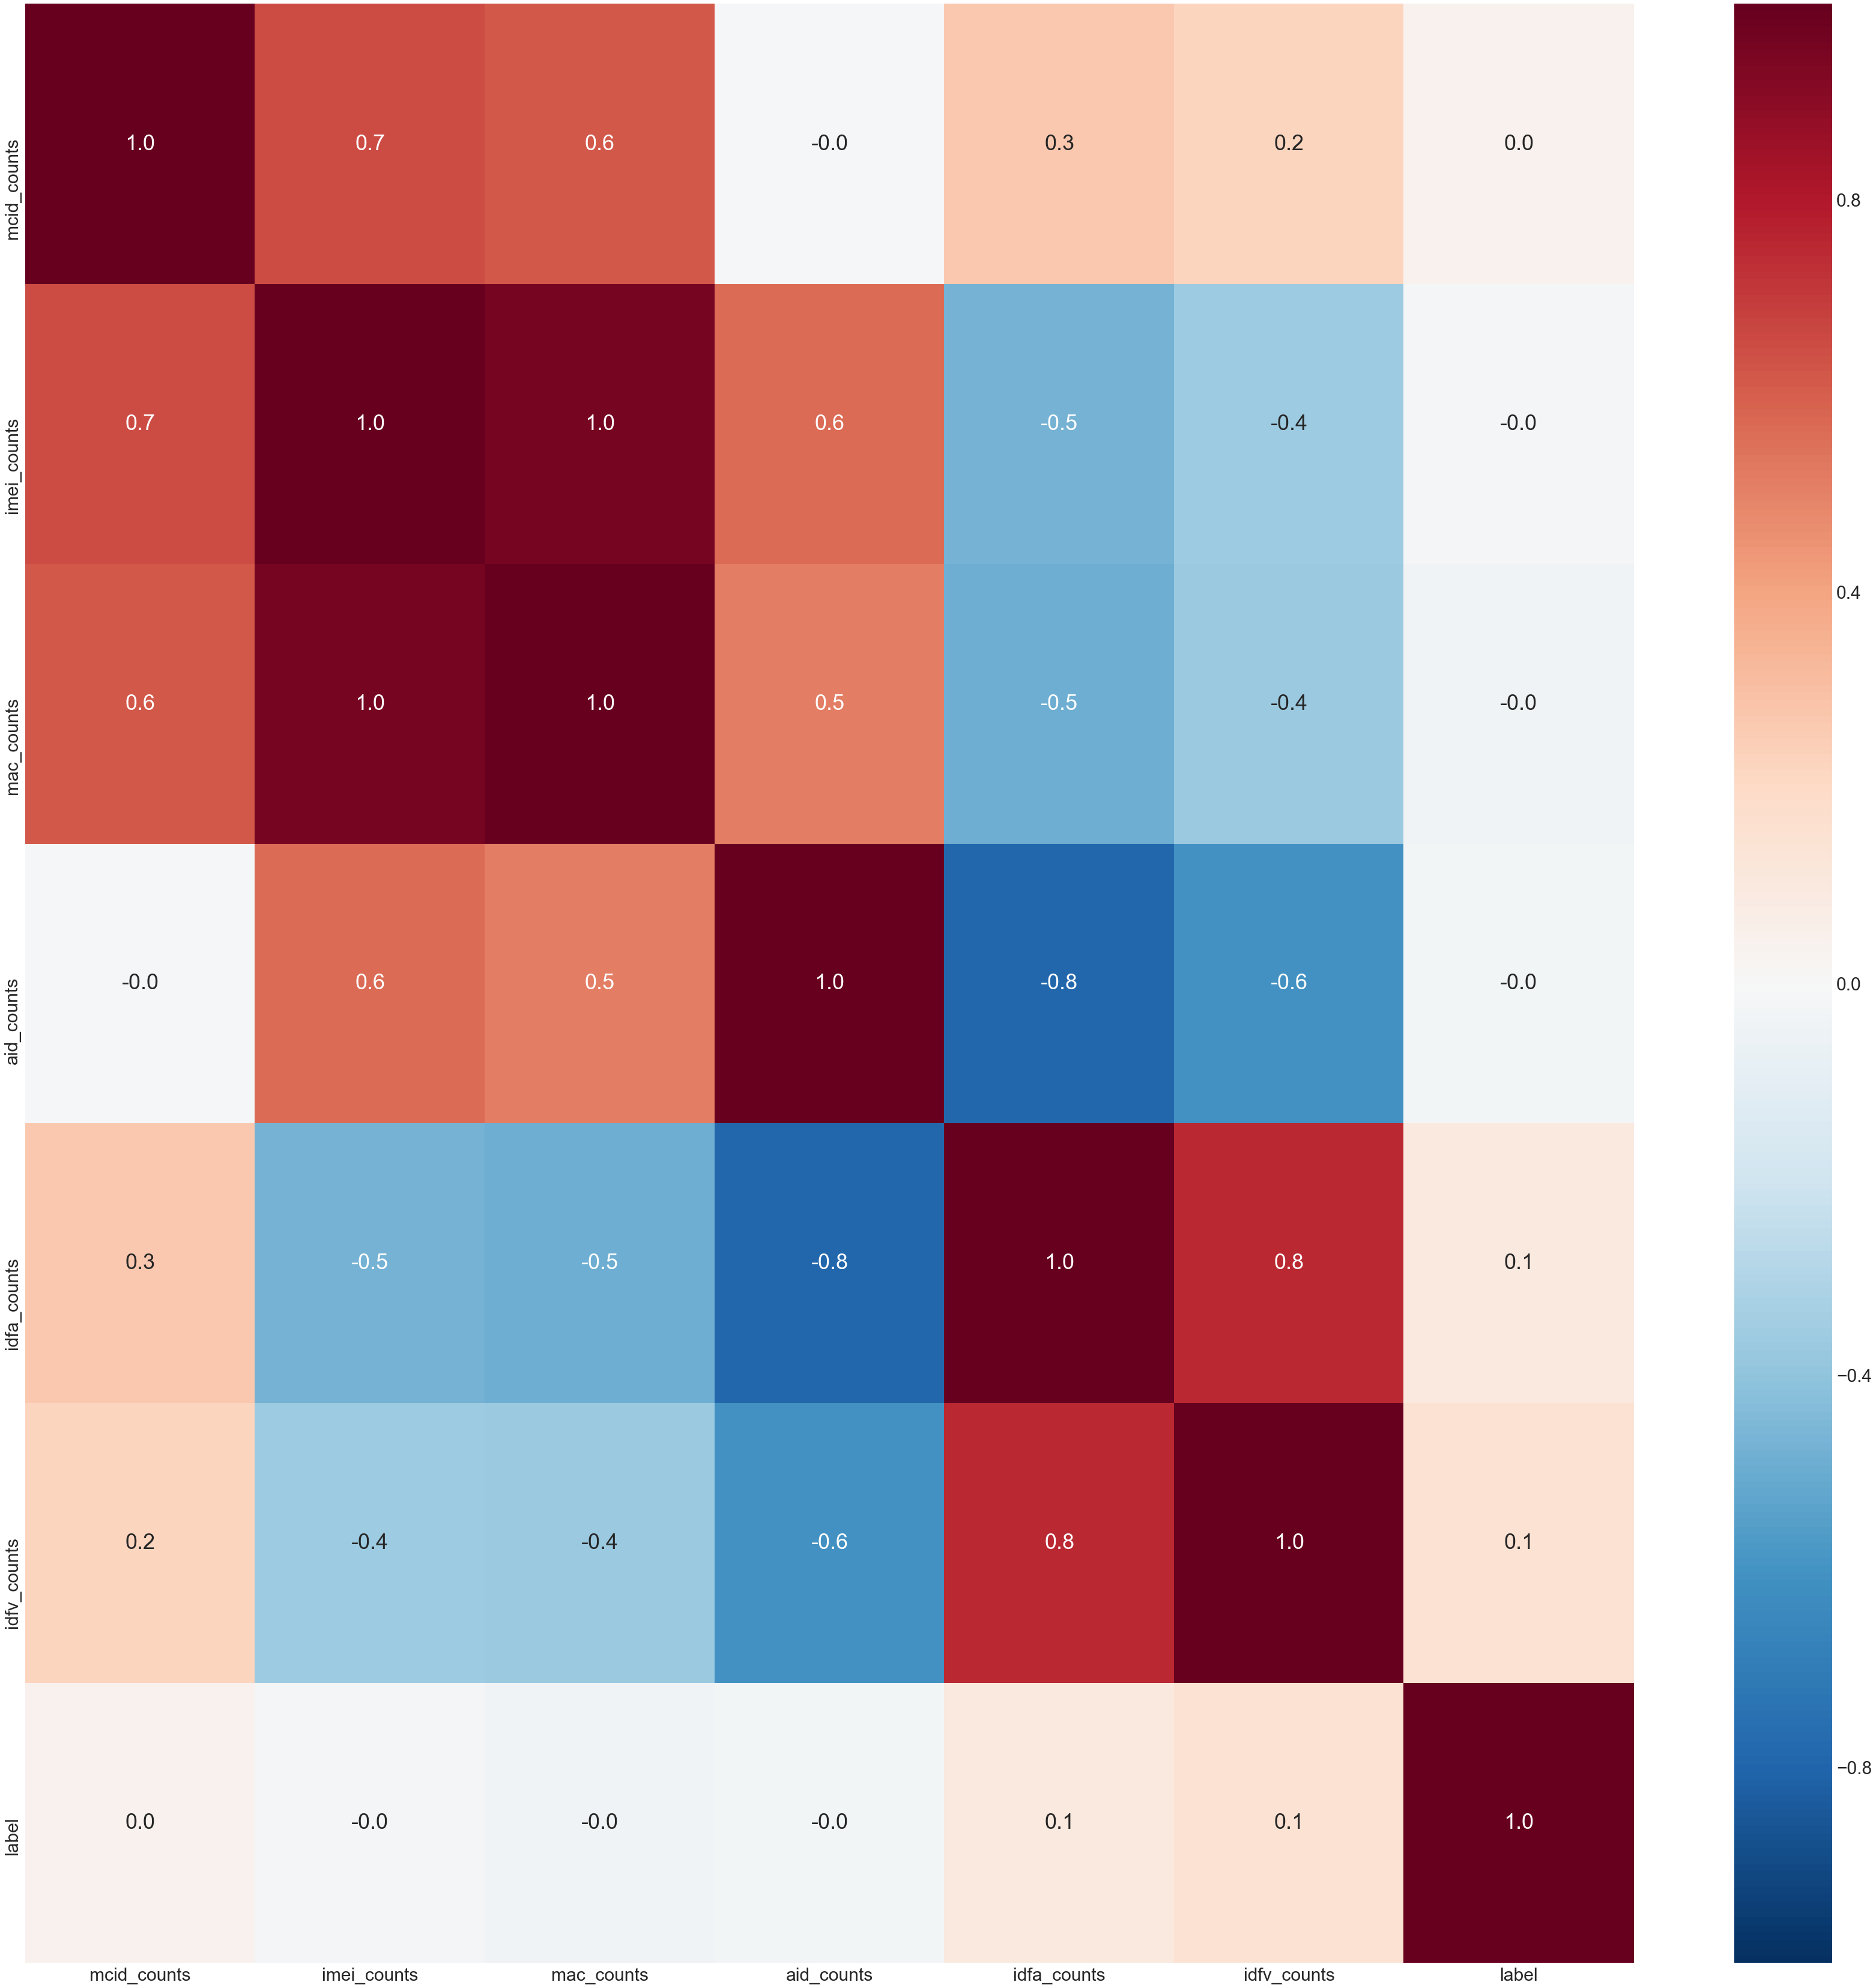

In [44]:
import seaborn as sns
sns.set(font_scale=3.0)
fig,ax= plt.subplots(figsize=(60,60))
# fig,ax= plt.subplots(dpi=400)
X_count = X[count_cols]
df_count = pd.concat([X_count,y],axis=1)
# sns.heatmap(df_anormaly.corr(),ax=ax)
sns.heatmap(df_count.corr(),ax=ax,annot=True,fmt='.1f')
plt.show()

In [45]:
count_cols

array(['mcid_counts', 'imei_counts', 'mac_counts', 'aid_counts',
       'idfa_counts', 'idfv_counts'], dtype=object)